In [125]:
import pandas as pd
import matplotlib.pyplot as plt
df2021 = pd.read_csv('../../data/raw/world-happiness-report-2021.csv')
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Cleaning and Adding

In [126]:
# Dataframe containing ladder scores of 2020 and 2021

df2020 = pd.read_csv('../../data/raw/world-happiness-report-2020.csv')
df = df2021.rename(columns={'Ladder score':'Ladder score 2021'})
df.insert(3,'Ladder score 2020',df2020['Ladder score'])
df.insert(4,'Ladder score difference (2021 subtracted by 2020)',df['Ladder score 2021'] - df['Ladder score 2020'])
temp = df['Standard error of ladder score']
df = df.drop('Standard error of ladder score',axis='columns')
df.insert(3,'Standard error of ladder score 2021',temp)
df.insert(5,'Standard error of ladder score 2020',df2020['Standard error of ladder score'])

In [127]:
# Dropping Explained By: Columns, upperwhisker and lowerwhisker
df = df.loc[:,'Country name':'Perceptions of corruption'].drop(['upperwhisker','lowerwhisker'], axis='columns')
df

,Country name,Regional indicator,Ladder score 2021,Standard error of ladder score 2021,Ladder score 2020,Standard error of ladder score 2020,Ladder score difference (2021 subtracted by 2020),Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.8087,0.031156,0.0333,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,7.6456,0.033492,-0.0256,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,0.036,7.5599,0.035014,0.0111,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,0.059,7.5045,0.059616,0.0495,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,0.027,7.4880,0.034837,-0.0240,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.5380,0.070261,-0.0260,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.5274,0.054158,-0.0604,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.4789,0.060543,-0.0639,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.4762,0.063210,-0.3312,7.943,0.750,56.201,0.677,-0.047,0.821


In [128]:
def load_and_process_shaheer(urlOrPathCSV1, urlOrPathCSV2):

    # Method Chain 1 (Load data and deal with missing data)

    df2021 = pd.read_csv(urlOrPathCSV1).dropna(axis='rows',how='any')
          

    # Method Chain 2 (drop columns, rename columns and do processing)

    df = df2021.loc[:,'Country name':'Perceptions of corruption'].drop(['upperwhisker','lowerwhisker'], axis='columns').rename(columns={'Ladder score':'Ladder score 2021'})


    # Method Chain 3 (Add new columns and reorder)
    df2020 = pd.read_csv(urlOrPathCSV2)
    df.insert(3,'Ladder score 2020',df2020['Ladder score'])
    df.insert(4,'Ladder score difference (2021 subtracted by 2020)',df['Ladder score 2021'] - df2['Ladder score 2020'])
    temp = df1['Standard error of ladder score']
    df = df.drop('Standard error of ladder score',axis='columns')
    df.insert(3,'Standard error of ladder score 2021',temp)
    df.insert(5,'Standard error of ladder score 2020',df2020['Standard error of ladder score'])
    
    return df

In [129]:
# Dropping any row that has null
print('Amount of rows before dropping:', len(df.index))
df = df.dropna(axis='rows', how='any')
print('Amount of rows after dropping:',len(df.index))

# No null values within our data

Amount of rows before dropping: 149
Amount of rows after dropping: 149


## Method Chain

In [130]:
def load_and_process_shaheer(urlOrPathCSV1, urlOrPathCSV2):

    # Method Chain 1 (Load data and deal with missing data)

    df2021 = pd.read_csv(urlOrPathCSV1).dropna(axis='rows',how='any')
          

    # Method Chain 2 (drop columns, rename columns and do processing)

    df = df2021.loc[:,'Country name':'Perceptions of corruption'].drop(['upperwhisker','lowerwhisker'], axis='columns').rename(columns={'Ladder score':'Ladder score 2021'})


    # Method Chain 3 (Add new columns and reorder)
    df2020 = pd.read_csv(urlOrPathCSV2)
    df.insert(3,'Ladder score 2020',df2020['Ladder score'])
    df.insert(4,'Ladder score difference (2021 subtracted by 2020)',df['Ladder score 2021'] - df['Ladder score 2020'])
    temp = df['Standard error of ladder score']
    df = df.drop('Standard error of ladder score',axis='columns')
    df.insert(3,'Standard error of ladder score 2021',temp)
    df.insert(5,'Standard error of ladder score 2020',df2020['Standard error of ladder score'])
    
    return (df,df2021,df2020)

In [131]:
tup = load_and_process_shaheer('../../data/raw/world-happiness-report-2021.csv','../../data/raw/world-happiness-report-2020.csv')

df = tup[0]
df2021 = tup[1]
df2020 = tup[2]


In [132]:
import seaborn as sns
import matplotlib.pyplot as p

<AxesSubplot:title={'center':'Boxplot of Ladder Score for Regions in 2020'}, xlabel='Ladder score 2020', ylabel='Regional indicator'>

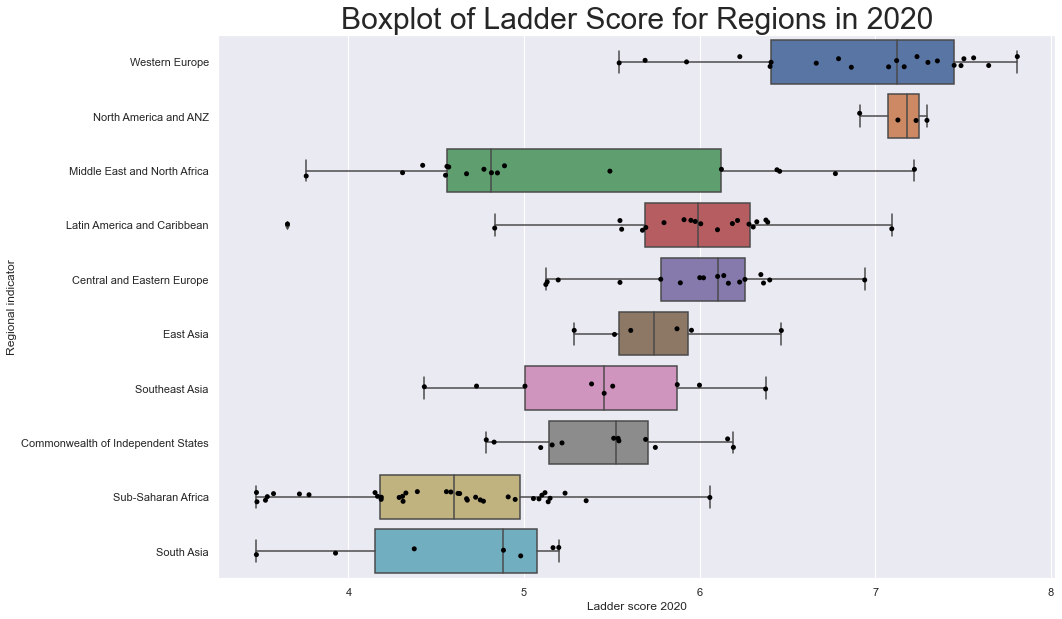

In [133]:

sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(data=df,x=df['Ladder score 2020'],y=df['Regional indicator']).set_title('Boxplot of Ladder Score for Regions in 2020',fontsize=30)
sns.stripplot(data = df, x=df['Ladder score 2020'],y=df['Regional indicator'],color = 'black')

<AxesSubplot:title={'center':'Boxplot of Ladder Score for Regions in 2021'}, xlabel='Ladder score 2021', ylabel='Regional indicator'>

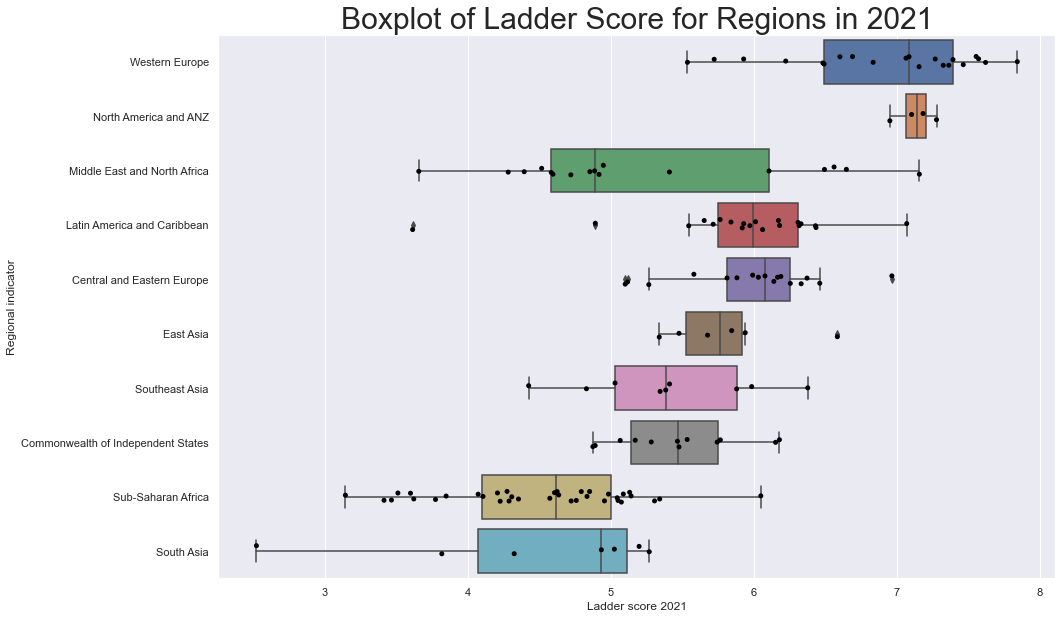

In [134]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(data=df,x=df['Ladder score 2021'],y=df['Regional indicator']).set_title('Boxplot of Ladder Score for Regions in 2021',fontsize=30)
sns.stripplot(data = df, x=df['Ladder score 2021'],y=df['Regional indicator'],color = 'black')

# Analysis


In [135]:
def grabMaxIndex(df, amountOfMax):
    lstOfIndex = []
    lst = list(df['Ladder score difference (2021 subtracted by 2020)'])
    
    for i in range(amountOfMax,0,-1):
        lstOfIndex.append(lst.index(max(lst)))
        lst[lst.index(max(lst))] = -100
    
    return lstOfIndex
    
    
    
    

In [136]:
lstOfIndex = grabMaxIndex(df,3)
lstOfIndex

[23, 24, 113]

In [137]:
def getDifferenceForEachMax(df1, df2, column,lst):
    dfT1 = df1[['Country name',column]]
    dfT2 = df2[['Country name',column]]
    newLst = []
    for i in lst:
        newLst.append(dfT1.loc[i,column] - dfT2.loc[i,column])
    return newLst

In [138]:
def getDF(df1, df2, column, lst):
    dfT = df1['Country name']
    dfT = dfT.to_frame()
    dfT = dfT.loc[lst]
    dfT.insert(1,'Difference of '+column, getDifferenceForEachMax(df1, df2, column,lst) )
    return dfT

In [139]:
getDF(df2021,df2020,'Ladder score',lstOfIndex)

,Country name,Difference of Ladder score
23,Taiwan Province of China,0.1190
24,United Arab Emirates,0.1056
113,Cambodia,0.1007


In [140]:
def plotByDf(df1, df2, column, lst):
     sns.barplot(data=getDF(df2021,df2020,column,lst), x='Country name',y='Difference of '+column).set_title('Difference of '+column+' by Country',fontsize=20)

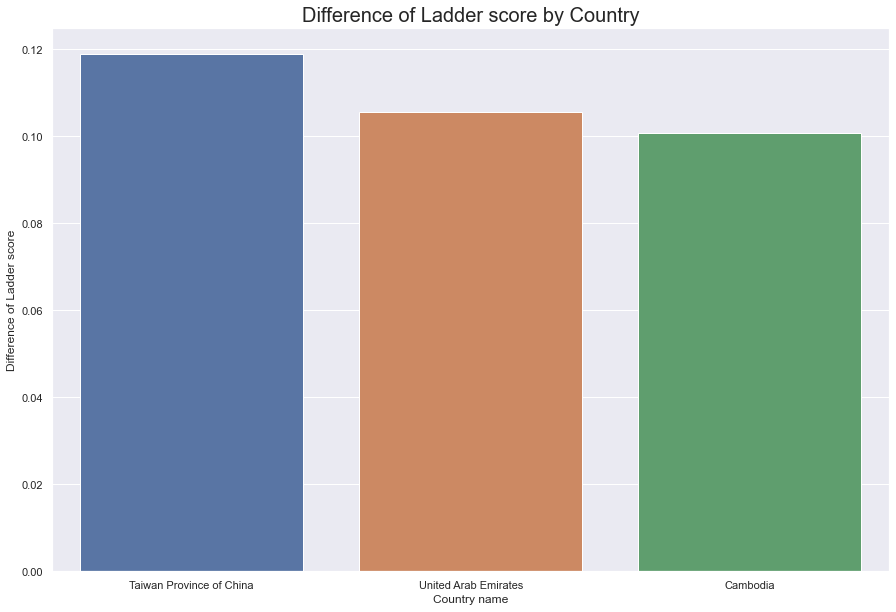

In [141]:
plotByDf(df2021,df2020,'Ladder score',lstOfIndex)

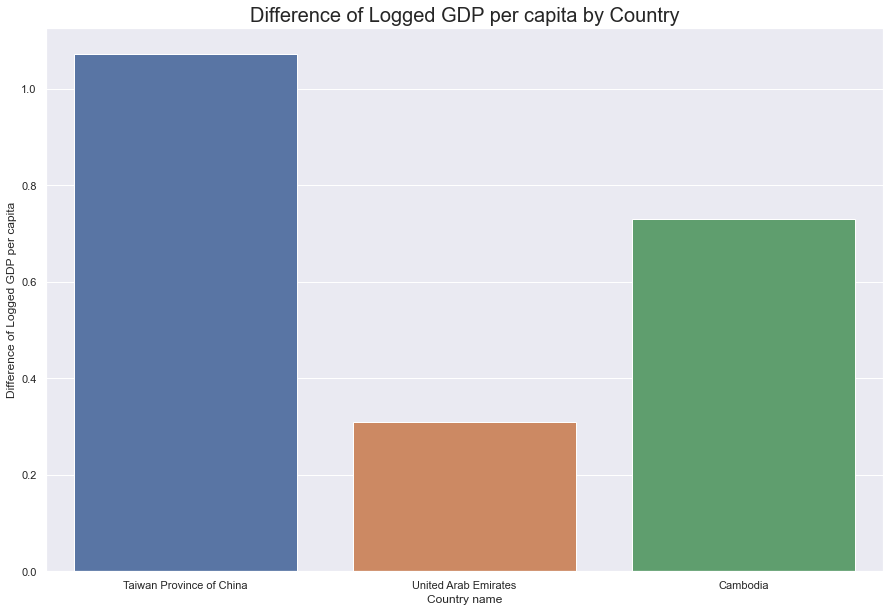

In [142]:
plotByDf(df2021,df2020,'Logged GDP per capita',lstOfIndex)

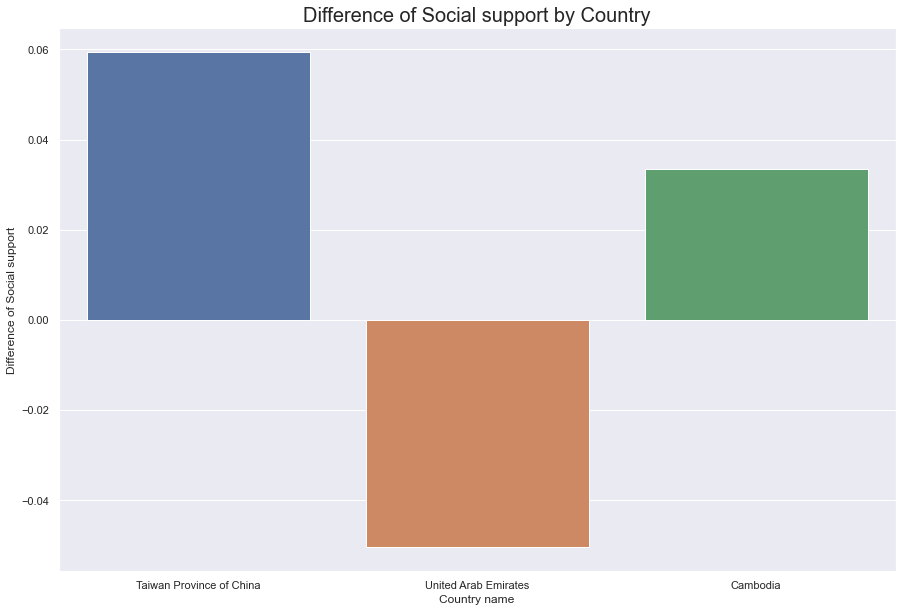

In [143]:
plotByDf(df2021,df2020,'Social support',lstOfIndex)

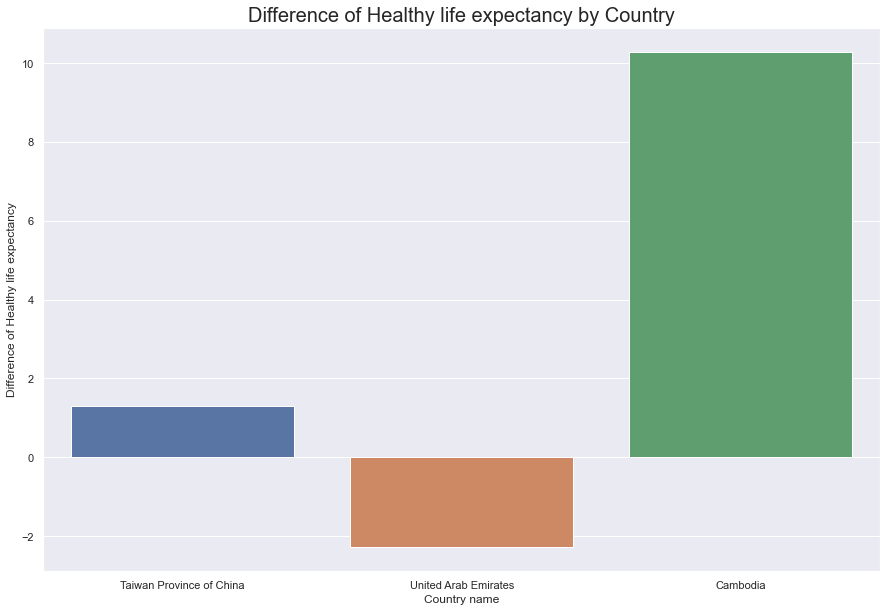

In [144]:
plotByDf(df2021,df2020,'Healthy life expectancy',lstOfIndex)

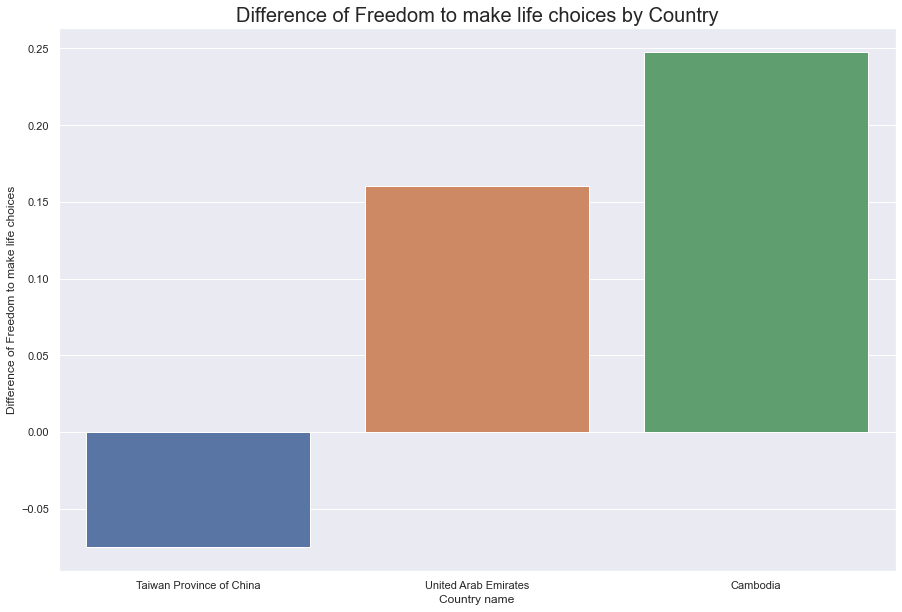

In [145]:
plotByDf(df2021,df2020,'Freedom to make life choices',lstOfIndex)

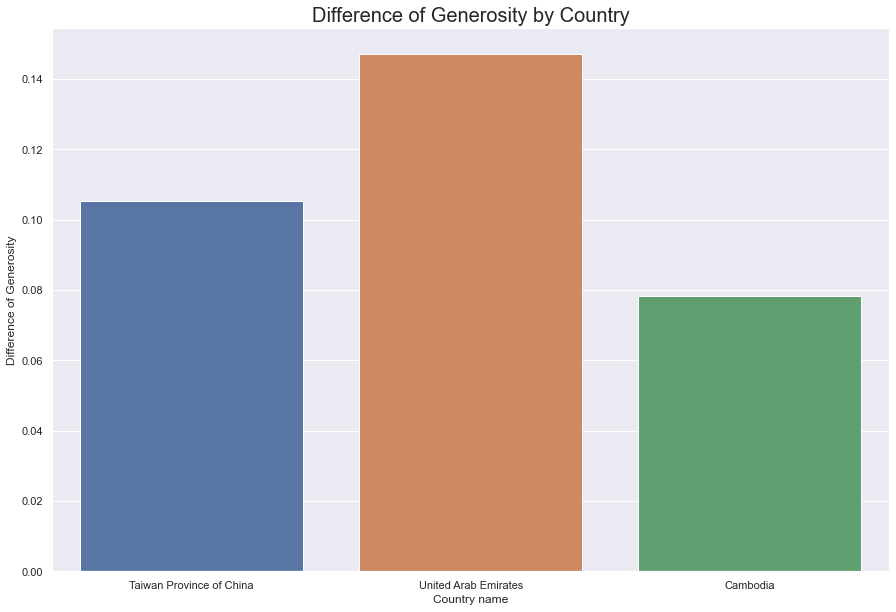

In [146]:
plotByDf(df2021,df2020,'Generosity',lstOfIndex)

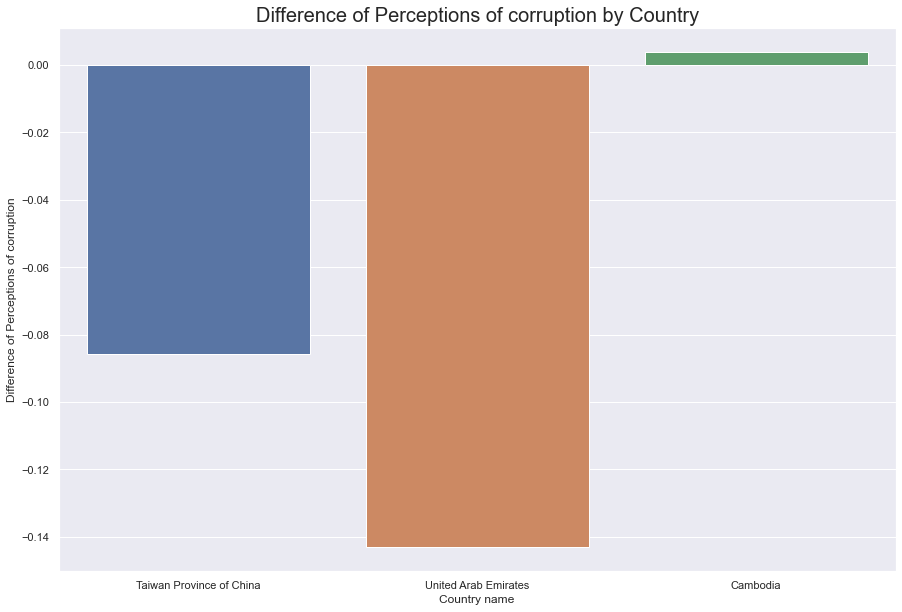

In [147]:
plotByDf(df2021,df2020,'Perceptions of corruption',lstOfIndex)

# Interpretation
#### From these graphs, we can see that the top three countries that improved their happiness the most since the height of the COVID-19 Pandemic were all focussing on improving their GDP per capita, while also keeping a focus on their nation-wide generosity. This makes sense because improving the economy and the generosity of a civilization ensures a better standard of living and quality of life. From the graphs, we can also that the perceptions of corruption generally decreased. Governments of countries must ensure that they are not abusing their power during times of uncertainty and distress, and instead use their position to better the quality of life of all citizens.